### 3D plot and curve fit with scipy optimize leastsq

https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725

In [2]:
%pylab inline
import scipy.optimize as opt
from mpl_toolkits import mplot3d

Populating the interactive namespace from numpy and matplotlib


[0.49589644 0.79893454]


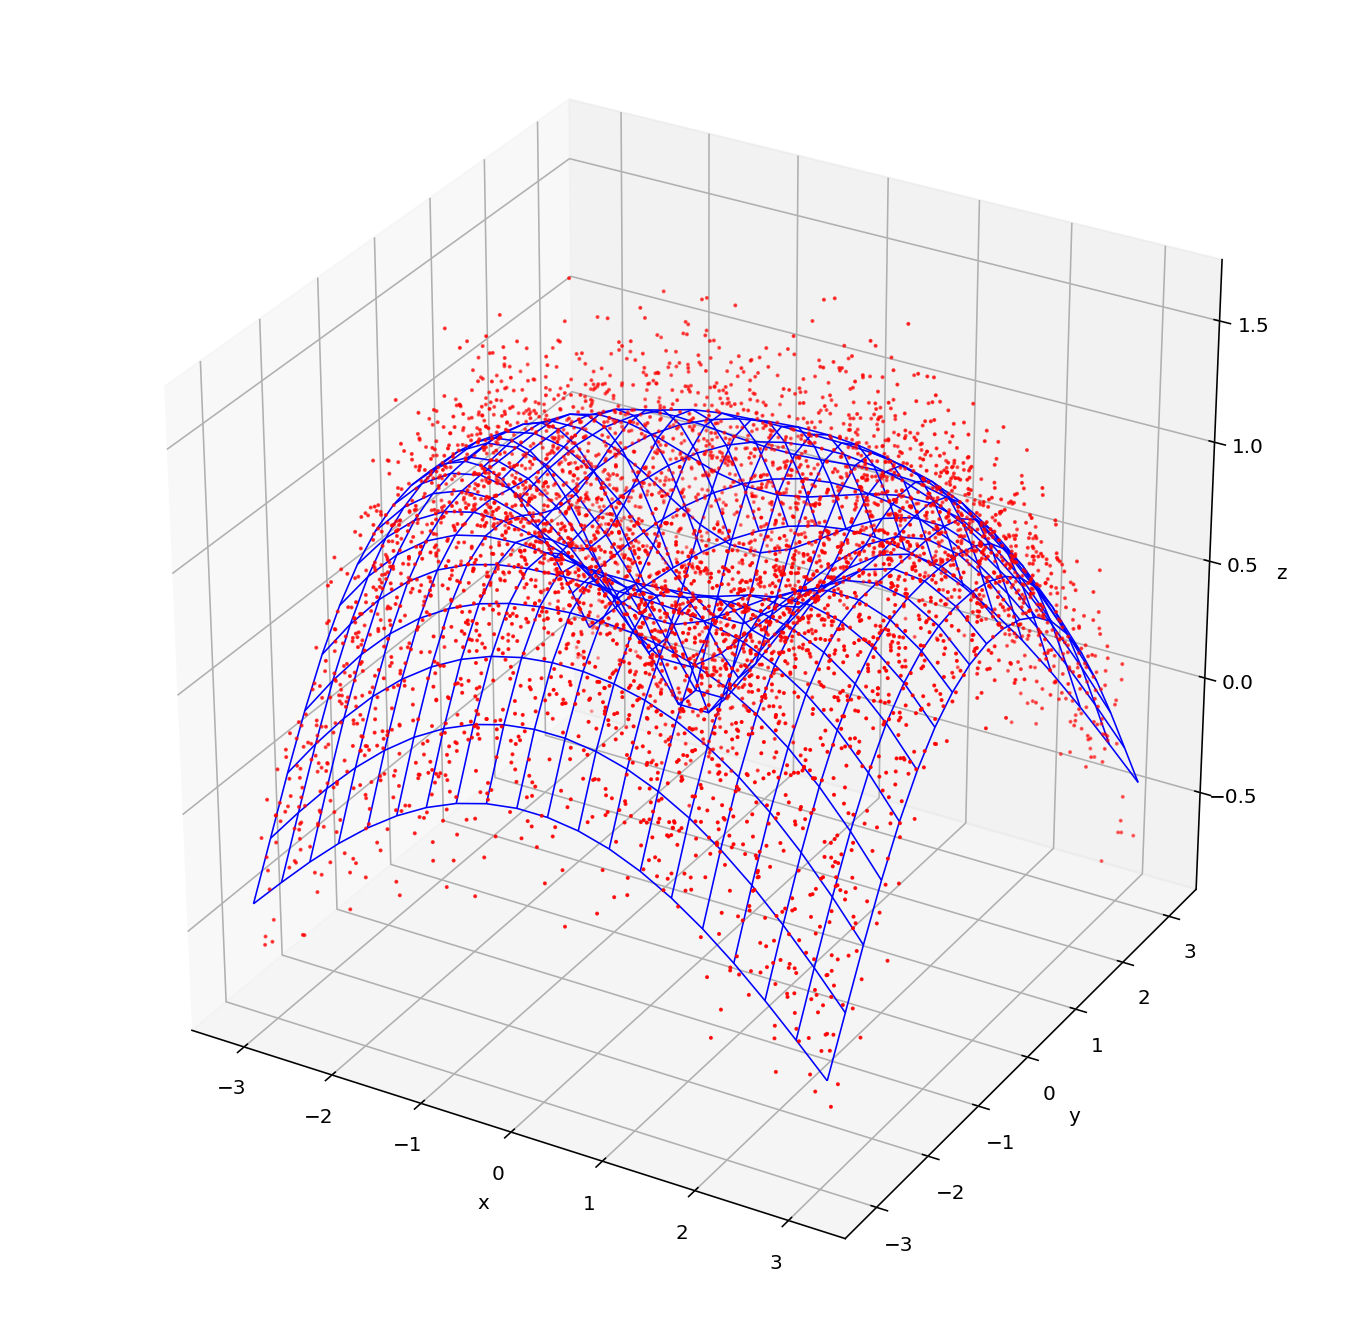

In [43]:
n = 5000
xs = np.random.uniform(-np.pi, np.pi, size=n)
ys = np.random.uniform(-np.pi, np.pi, size=n)

def func(x, y, a,b):
    return np.sin(np.sqrt(a*x**2 + b*y**2))

# initial parameters
a, b = 0.5, 0.8
zs = func(xs, ys, a,b)

# add some noise
zs += np.random.normal(0, 0.2, size=len(zs))

# plot scatter
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d');
ax.scatter3D(xs, ys, zs, c='red', s=1);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');

# leastsq use min. of sum square residu
def residu(parms):
    return func(xs, ys, *parms) - zs
# calculate optimal parameters with least square
parms, _ = opt.leastsq(residu, [1,1])
print (parms)

# plot wire frame
x = np.linspace(min(xs), max(xs), 20)
y = np.linspace(min(ys), max(ys), 20)
Zfit = func(X, Y, *parms)
ax.plot_wireframe(X, Y, Zfit, color='blue', lw=0.8);
